In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from pandas_profiling import ProfileReport
import numpy as np

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')

In [5]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [7]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
#Data preprocessing steps
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<AxesSubplot:>

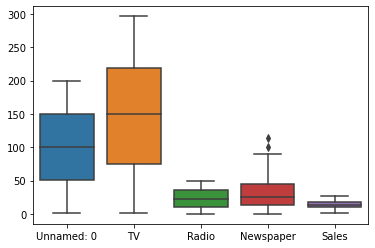

In [13]:
# Outlier
import seaborn as sns
sns.boxplot(data=df)

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

In [15]:
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:>

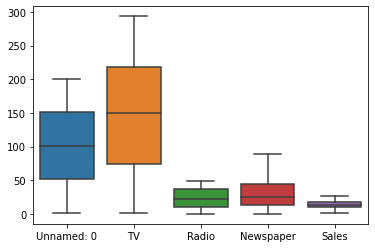

In [16]:
sns.boxplot(data=df)

In [17]:
df.shape

(198, 5)

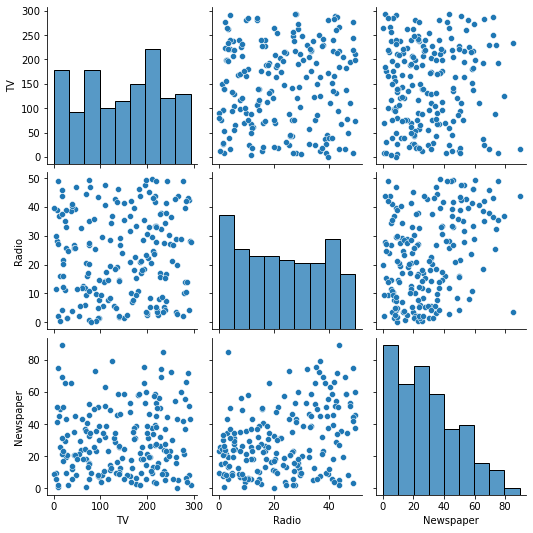

In [18]:
sns.pairplot(df.iloc[:, 1:4])

C:\Users\win\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

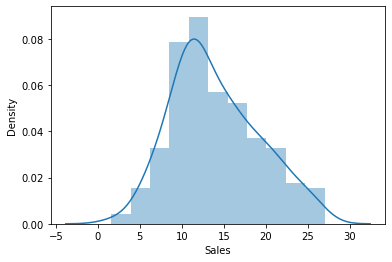

In [19]:
# Uni-variates
sns.distplot(df['Sales'])

In [20]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.010991,-0.105193,-0.137040,-0.054703
TV,0.010991,1.000000,0.051978,0.049771,0.779121
Radio,-0.105193,0.051978,1.000000,0.346364,0.576748
Newspaper,-0.137040,0.049771,0.346364,1.000000,0.219555
Sales,-0.054703,0.779121,0.576748,0.219555,1.000000


In [30]:
X = df.iloc[:, 1:4]
y = df.Sales

In [33]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [31]:
# Split the data into training and test

from sklearn.model_selection import train_test_split  # 3.1/2/3...8
#from sklearn.cross_validation import train_test_split  # 2.7 

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(50, 3)
(148,)
(50,)


In [37]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [35]:
linear.fit(X,y)

LinearRegression()

In [36]:
print(linear.intercept_)
print(linear.coef_)

2.952308567118184
[ 0.04569034  0.18855047 -0.00117766]


In [40]:
#Prediction
y_pred = linear.predict(x_test)

In [60]:
np.mean((y_pred-y_test))

0.4356024801942511

C:\Users\win\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Sales'>

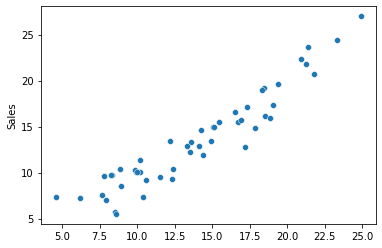

In [43]:
sns.scatterplot(y_pred, y_test)

C:\Users\win\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

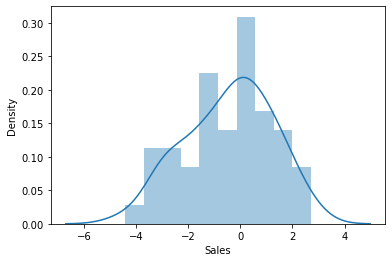

In [55]:
sns.distplot((y_test - y_pred), bins=10)

In [39]:
#Measure Accuracy
linear.score(x_train, y_train)

0.8968146768952744

In [47]:
#OLS method
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [48]:
reg_model = smf.OLS(endog = y_train, exog = x_train).fit()

In [49]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2565.
Date:                Thu, 12 May 2022   Prob (F-statistic):                   2.18e-125
Time:                        01:58:57   Log-Likelihood:                         -316.17
No. Observations:                 148   AIC:                                      638.3
Df Residuals:                     145   BIC:                                      647.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0550      0.002     33.116      0.000       0.052       0.058
Radio          0.2195      0.011     19.604      0.000       0.197       0.242
Newspaper      0.0170      0.009      1.978      0.050     1.3e-05       0.034
==============================================================================
Omnibus:                        7.689   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                9.233
Skew:                          -0.346   Prob(JB):                      0.00989
Kurtosis:                       4.009   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
file = 'linear_reg.sav'
pickle.dump(linear,open(file,'wb'))


In [43]:

m = 0
b = 0

learning_rate = 0.001
for i in range(len(x)):
    x1 = x.iloc[0,:].values[0]
    y1 = y.iloc[0,:].values[0]
    guess = m * x1 + b
    error = y1 - guess
    m -= error * x1 * learning_rate
    b -= error * learning_rate
    print(error)


IndexingError: Too many indexers

In [44]:
def gd(x,y,n):
    m=6
    c=3
    alpha=0.8
    len=x.shape[0]
    for r in range(n):
        y_pred=m*x +c
        cost=(1/len)*((y_pred-y)**2).sum()
        print('cost is ',cost)
        m=m-(-alpha/len)*((y-y_pred)*x).sum()
        c=c-(-alpha/len)*((y-y_pred).sum())
        print('m,c is',m,c)
        if cost<1:
            plt.scatter(x,y)
            plt.plot(x,y_pred)


In [ ]:
file = 'linear_reg.sav'
pickle.dump(linear,open(file,'wb'))

In [45]:
saved_model = pickle.load(open(file,'rb'))

In [46]:
saved_model.predict([[45]])

array([9.17174237])

In [47]:
linear.score(x,y)

0.611875050850071